<a href="https://colab.research.google.com/github/krishn07k/Machine_learning/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt


In [ ]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

train_images,test_images = train_images/255.0, test_images/255.0


170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(train_images,train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5285 - accuracy: 0.4421 - val_loss: 1.2453 - val_accuracy: 0.5522
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1581 - accuracy: 0.5885 - val_loss: 1.1049 - val_accuracy: 0.6080
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0061 - accuracy: 0.6463 - val_loss: 0.9696 - val_accuracy: 0.6573
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9063 - accuracy: 0.6809 - val_loss: 0.9429 - val_accuracy: 0.6673
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8260 - accuracy: 0.7092 - val_loss: 0.8791 - val_accuracy: 0.6951
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7667 - accuracy: 0.7313 - val_loss: 0.8982 - val_accuracy: 0.6896
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7207 - accuracy: 0.7477 - val_loss: 0.8550 -

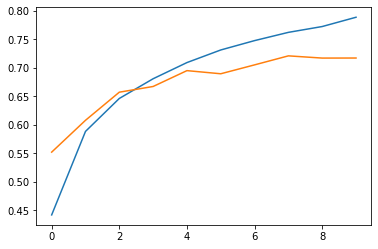

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)

313/313 - 4s - loss: 0.8414 - accuracy: 0.7172 - 4s/epoch - 12ms/step
